# Project 1: SAT & ACT Analysis



## Problem Statement

State legislations mandating SAT & ACT exams on students may have caused individual state score averages to decline.

In certain states, we have seen a decline in the average SAT & ACT Total & Composite scores respectively.

At first glance, low averages may be indicative of a State's education quality. However, as we will see in the analysis that follows, that this is not necessarily the case.

We should investigate, amongst other factors, if implementing rules to mandate standardized tests may bring about the misleading conclusion of a State's education quality.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline 

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
SAT_2017 = pd.read_csv("../data/sat_2017.csv")
ACT_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
SAT_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [4]:
SAT_2017.head(5)
#SAT_2017.head(100)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [5]:
ACT_2017.head(5)
#ACT_2017.head(100)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
#just by looking through the 50 rows by calling SAT_2017.head(), 
#maryland's total figure seems to be off

#calculating the actual total based on our data - 
#this table is for reference only to spot the discrepancy, columns will be dropped

SAT_2017['true_total'] = SAT_2017["Evidence-Based Reading and Writing"] + SAT_2017["Math"] 
SAT_2017['difference'] = SAT_2017['true_total'] - SAT_2017["Total"]
SAT_2017['is_same'] = SAT_2017['true_total'] == SAT_2017["Total"]

SAT_2017.head(100)
#we see that Maryland's total from the data that we retrieved vs 
#the calculated total has a discrepancy of large magnitude

#some other states have a discrepancy of absolute magnitude 1 -> this is likely due to 
#rounding differences

,State,Participation,Evidence-Based Reading and Writing,Math,Total,true_total,difference,is_same
0,Alabama,5%,593,572,1165,1165,0,True
1,Alaska,38%,547,533,1080,1080,0,True
2,Arizona,30%,563,553,1116,1116,0,True
3,Arkansas,3%,614,594,1208,1208,0,True
4,California,53%,531,524,1055,1055,0,True
5,Colorado,11%,606,595,1201,1201,0,True
6,Connecticut,100%,530,512,1041,1042,1,False
7,Delaware,100%,503,492,996,995,-1,False
8,District of Columbia,100%,482,468,950,950,0,True
9,Florida,83%,520,497,1017,1017,0,True


In [7]:
SAT_2017.drop(columns=['difference','is_same','true_total'], inplace=True)
#dropping columns that were previously added for visualization purposes

In [8]:
SAT_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [9]:
#checking datatypes of ACT_2017
ACT_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [10]:
# Checking if our calculated composite is equal to the composite value given in the table

ACT_2017['true_composite'] = (ACT_2017['English'] + 
                              ACT_2017['Math'] + 
                              ACT_2017['Reading'] +
                              ACT_2017['Science'])/4

#removing incorrect characters in ACT_2017['COMPOSITE'] and changing values to float,
#so that we can calculate the difference between the true_composite(calculated) vs the given
#composite:
ACT_2017['floated_composite'] = ACT_2017['Composite'].apply(lambda x: float(x.replace("x",""))) 

ACT_2017['difference'] = ACT_2017['true_composite'] - ACT_2017['floated_composite']
ACT_2017['is_same'] = ACT_2017['floated_composite'] == ACT_2017['true_composite'] #false means
#our calculated composite's distance from the given composite is not zero

#this table is for reference only, columns will be dropped
# Most aren't equal - difference may be due to rounding as differences are small

In [11]:
ACT_2017.head(100)

,State,Participation,English,Math,Reading,Science,Composite,true_composite,floated_composite,difference,is_same
0,National,60%,20.3,20.7,21.4,21.0,21.0,20.850,21.0,-0.150,False
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,19.100,19.2,-0.100,False
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,19.700,19.8,-0.100,False
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,19.575,19.7,-0.125,False
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,19.275,19.4,-0.125,False
5,California,31%,22.5,22.7,23.1,22.2,22.8,22.625,22.8,-0.175,False
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8,20.625,20.8,-0.175,False
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,25.075,25.2,-0.125,False
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1,23.975,24.1,-0.125,False
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,24.075,24.2,-0.125,False


In [12]:
ACT_2017.drop(columns=['difference','is_same','true_composite','floated_composite'], inplace=True)

In [13]:
ACT_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: SAT_2017 & ACT_2017 describe the participation rate along with individual and total or average scores for each state that took SAT & ACT exams.

#### 4a. Does the data look complete? 

Answer: Data looks complete at first glance as all necessary values have been filled, 
but upon checking some states have total scores that do not match up with individual 
subject scores.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [14]:
Min_ACT_2017 = ACT_2017[['English','Math','Reading','Science']].min()
Min_ACT_2017

English    16.3
Math       18.0
Reading    18.1
Science     2.3
dtype: float64

In [15]:
Max_ACT_2017 = ACT_2017[['English','Math','Reading','Science']].max()
Max_ACT_2017

English    25.5
Math       25.3
Reading    26.0
Science    24.9
dtype: float64

In [16]:
Min_SAT_2017 = SAT_2017[['Evidence-Based Reading and Writing','Math','Total']].min()
Min_SAT_2017

Evidence-Based Reading and Writing    482
Math                                   52
Total                                 950
dtype: int64

In [17]:
Max_SAT_2017 = SAT_2017[['Evidence-Based Reading and Writing','Math','Total']].max()
Max_SAT_2017

Evidence-Based Reading and Writing     644
Math                                   651
Total                                 1295
dtype: int64

Answer: Minimum and maximum scores achieved in 2017 for various subjects part of the ACT and SAT exams are shown above.

Minimum and maximum possible scores for ACT & SAT exams respectively:

ACT score range: 1 TO 36.
ACT composite: An average of all ACT component scores.

SAT subject score range: 200 to 800.
SAT total score range: 400 to 1600. 

Things to note: Maryland has a minimum score of 52 for Math, which is under the minimum possible of 200.

Based on the SAT link provided above, our data for the average Math SAT score in Maryland was incorrectly retrieved. As per our source, the value should be 524 instead of 52.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [18]:
SAT_2017.iloc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                        52
Total                                     1060
Name: 20, dtype: object

In [19]:
#code
#Changing Maryland's Math SAT score of 52 in our dataframe to 524 (retrieved from source)
SAT_2017.loc[SAT_2017.State == 'Maryland', 'Math'] = 524
SAT_2017.iloc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [20]:
#code
print("SAT_2017 datatypes\n", SAT_2017.dtypes, end="\n\n", sep="")
#Participation should be a float

print("ACT_2017 datatypes\n", ACT_2017.dtypes, sep="")
#Participation and Composite should be floats

SAT_2017 datatypes
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT_2017 datatypes
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation is a rate - should either be an integer or float, but will be converted to integer to match datatype in 2018 data. Also based on what we can see in the overview of the SAT and ACT dataframes, all are percentage figures in the Participation column are rounded figures.

The composite score is the average of four test scores, and should be represented by a float type. The composite score for Wyoming also has a non-number that shouldn't be there.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [21]:
#code
SAT_2017['Participation'] = SAT_2017['Participation'].map(lambda x: int(x.replace("%","")))
#changing 'Participation' column values to float

In [22]:
#Looking for the error in 'Composite' column causing the column to be an object
ACT_2017['Composite'].tail(5)

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [23]:
ACT_2017['Composite'] = ACT_2017['Composite'].apply(lambda x: float(x.replace("x",""))) 
#removing incorrect characters in ACT_2017['COMPOSITE'] and changing values to float

- Finish your data modifications by making sure the columns are now typed appropriately.

In [24]:
ACT_2017['Participation'] = ACT_2017['Participation'].map(lambda x: int(x.replace("%","")))
#changing 'Participation' column values to float

- Display the data types again to confirm they are correct.

In [25]:
SAT_2017.dtypes #checking datatypes of ACT_2017

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [26]:
ACT_2017.dtypes #checking datatypes of SAT_2017

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [27]:
SAT_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [28]:
ACT_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [29]:
#code

for col in SAT_2017.columns:
    if col != "State":
        SAT_2017.rename(columns={
            col: (col + "_sat17").lower().replace(" ", "_").replace("-","_")}, 
            inplace=True)
    elif col == "State":
        SAT_2017.rename(columns={
            col: col.lower()}, inplace=True)
        
        

for col in ACT_2017.columns:
    if col != "State":
        ACT_2017.rename(columns={
            col: (col + "_act17").lower().replace(" ", "_").replace("-","_")}, 
            inplace=True)
    elif col == "State":
        ACT_2017.rename(columns={
            col: col.lower()}, inplace=True)

# manual renaming:
# ACT_2017.rename(columns={
#     'State':'State', 
#     'Participation':'participation_act17', 
#     'English':'english_act17', 
#     'Math':'math_act17', 
#     'Reading':'reading_act17', 
#     'Science':'science_act17',
#     'Composite':'composite_act17',   
# }, inplace=True)

# SAT_2017.rename(columns={
#     'State':'State',
#     'Participation':'participation_sat17',
#     'Evidence-Based Reading and Writing': 'reading_and_writing_sat17',
#     'Math':'math_sat17',
#     'Total':'total_sat17' 
# }, inplace=True)

In [30]:
ACT_2017.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17'],
      dtype='object')

In [31]:
SAT_2017.columns

Index(['state', 'participation_sat17',
       'evidence_based_reading_and_writing_sat17', 'math_sat17',
       'total_sat17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
#code
ACT_2017 = ACT_2017.drop(ACT_2017.index[0])

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
#Code:
combined_2017 = pd.merge(SAT_2017, ACT_2017, on="state", how="outer")

In [34]:
combined_2017

,state,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [35]:
#code
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [36]:
SAT_2018 = pd.read_csv("../data/sat_2018.csv")
ACT_2018 = pd.read_csv("../data/act_2018_updated.csv")

In [37]:
SAT_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [38]:
SAT_2018['Participation'] = SAT_2018['Participation'].map(lambda x: int(x.replace("%","")))
#changing 'Participation' column values to float

In [39]:
ACT_2018.rename(columns={
    'Percentage of Students Tested':'Participation'},inplace=True)

#renaming SAT_2018 columns:
for col in SAT_2018.columns:
    if col != "State":
        SAT_2018.rename(columns={
            col: (col + "_sat18").lower().replace(" ", "_").replace("-","_")}, 
            inplace=True)
    elif col == "State":
        SAT_2018.rename(columns={
            col: col.lower()}, inplace=True)

#renaming ACT_2018 columns:
for col in ACT_2018.columns:
    if col != "State":
        ACT_2018.rename(columns={
            col: (col + "_act18").replace("Average ", "").replace(" Score","").lower()}, 
            inplace=True)
    elif col == "State":
        ACT_2018.rename(columns={
            col: col.lower()}, inplace=True)


In [40]:
SAT_2018.columns

Index(['state', 'participation_sat18',
       'evidence_based_reading_and_writing_sat18', 'math_sat18',
       'total_sat18'],
      dtype='object')

In [41]:
ACT_2018.columns

Index(['state', 'participation_act18', 'composite_act18', 'english_act18',
       'math_act18', 'reading_act18', 'science_act18'],
      dtype='object')

In [42]:
#checking if datatypes are consistent across datasets

print("data type for SAT_2017:\n", SAT_2017.dtypes, end="\n\n", sep="")
print("data type for SAT_2018:\n", SAT_2018.dtypes, end="\n\n", sep="")
print("data type for ACT_2017:\n", ACT_2017.dtypes, end="\n\n", sep="")
print("data type for ACT_2018:\n", ACT_2018.dtypes, end="\n\n", sep="")

data type for SAT_2017:
state                                       object
participation_sat17                          int64
evidence_based_reading_and_writing_sat17     int64
math_sat17                                   int64
total_sat17                                  int64
dtype: object

data type for SAT_2018:
state                                       object
participation_sat18                          int64
evidence_based_reading_and_writing_sat18     int64
math_sat18                                   int64
total_sat18                                  int64
dtype: object

data type for ACT_2017:
state                   object
participation_act17      int64
english_act17          float64
math_act17             float64
reading_act17          float64
science_act17          float64
composite_act17        float64
dtype: object

data type for ACT_2018:
state                   object
participation_act18      int64
composite_act18        float64
english_act18          float64
math_act

In [43]:
ACT_2018.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [44]:
#reordering ACT_2018 columns to match order of 2017 data
ACT_2018 = ACT_2018[['state', 'participation_act18', 'english_act18', 
               'math_act18', 'reading_act18', 'science_act18',
               'composite_act18']]

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [45]:
combined_2018 = pd.merge(SAT_2018, ACT_2018, on="state", how="outer")
final = pd.merge(combined_2017, combined_2018, on="state", how="outer")

In [46]:
final.head(100)

,state,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,...,100,519,506,1025,30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,...,100,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,...,100,505,492,998,17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,...,92,497,480,977,32,23.7,22.7,24.4,23.0,23.6
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,...,56,550,549,1099,66,19.2,19.3,21.1,19.5,19.9


In [47]:
final.dtypes

state                                        object
participation_sat17                           int64
evidence_based_reading_and_writing_sat17      int64
math_sat17                                    int64
total_sat17                                   int64
participation_act17                           int64
english_act17                               float64
math_act17                                  float64
reading_act17                               float64
science_act17                               float64
composite_act17                             float64
participation_sat18                           int64
evidence_based_reading_and_writing_sat18      int64
math_sat18                                    int64
total_sat18                                   int64
participation_act18                           int64
english_act18                               float64
math_act18                                  float64
reading_act18                               float64
science_act1

In [48]:
final.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [49]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_sat17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
evidence_based_reading_and_writing_sat17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
participation_act17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act17,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
composite_act17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [50]:
final.describe()

,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
final.head()

,state,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [52]:
#final['participation_sat17'].sum(axis=0)/51

def stdev_calculator(col):
    colmean = col.sum(axis=0)/len(col)
    sum_col = 0
    for elm in col:
        sum_col += (elm-colmean)**2
    return (sum_col/len(col))**0.5
    

In [53]:
stdev_calculator(final['math_sat17'])

46.65713364485503

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [54]:
#Code:
#df.select_dtypes(include=np.number) ---> chooses datatypes that are to be included,
#since we only want numeric columns in the dataframe

{col : stdev_calculator(final[col]) for col in final.select_dtypes(include=np.number)}

{'participation_sat17': 34.92907076664508,
 'evidence_based_reading_and_writing_sat17': 45.21697020437866,
 'math_sat17': 46.65713364485503,
 'total_sat17': 91.58351056778743,
 'participation_act17': 31.824175751231806,
 'english_act17': 2.3304876369363363,
 'math_act17': 1.9624620273436781,
 'reading_act17': 2.0469029314842646,
 'science_act17': 3.151107895464408,
 'composite_act17': 2.000786081581989,
 'participation_sat18': 36.946619223539415,
 'evidence_based_reading_and_writing_sat18': 47.03460978357609,
 'math_sat18': 47.30194550378352,
 'total_sat18': 93.22742384464433,
 'participation_act18': 33.745194881997506,
 'english_act18': 2.4222536143202795,
 'math_act18': 2.0157072555557174,
 'reading_act18': 2.145891884510421,
 'science_act18': 1.851688548483354,
 'composite_act18': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [55]:
#comparing the first value (our calculated stdev), vs
#the second value (stdev from numpy) vs
#the third value (stdev from pandas)

d= {col : [stdev_calculator(final[col]),np.std(final[col]),final[col].std()] for col in final.select_dtypes(include=np.number)}
for key,value in d.items():
    print(key, value, end='\n\n')

participation_sat17 [34.92907076664508, 34.92907076664508, 35.276632270013046]

evidence_based_reading_and_writing_sat17 [45.21697020437866, 45.21697020437866, 45.66690138768932]

math_sat17 [46.65713364485503, 46.65713364485503, 47.12139516560329]

total_sat17 [91.58351056778743, 91.58351056778743, 92.49481172519046]

participation_act17 [31.824175751231806, 31.824175751231806, 32.14084201588683]

english_act17 [2.3304876369363363, 2.3304876369363363, 2.35367713980303]

math_act17 [1.9624620273436781, 1.9624620273436781, 1.9819894936505533]

reading_act17 [2.0469029314842646, 2.0469029314842646, 2.0672706264873146]

science_act17 [3.151107895464408, 3.151107895464408, 3.182462975155452]

composite_act17 [2.000786081581989, 2.000786081581989, 2.020694891154341]

participation_sat18 [36.946619223539415, 36.946619223539415, 37.31425633039196]

evidence_based_reading_and_writing_sat18 [47.03460978357609, 47.03460978357609, 47.50262737831599]

math_sat18 [47.30194550378352, 47.301945503783

Answer: We can see that if we run the above, that all 3 values are different.
The estimator we used is over N, whereas pandas uses the unbiased estimator over (N-1) - which is what should be used when calculating using a sample population. The standard deviation
calculated by numpy doesn't vary far from our calculated value and may be due to floating point errors.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [56]:
#code
sat17_participation = final.sort_values(by = ['participation_sat17'], ascending=False)
sat17_participation.head(10)

,state,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,...,92,497,480,977,32,23.7,22.7,24.4,23.0,23.6
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,...,100,511,499,1011,22,24.5,23.9,24.7,23.9,24.4
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,...,100,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,...,100,505,492,998,17,23.7,23.1,24.5,23.4,23.2
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,...,96,535,528,1063,16,25.1,24.7,25.6,24.4,25.1
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,...,99,512,501,1013,7,23.8,23.6,24.7,23.4,24.0
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,...,100,508,493,1001,36,21.9,21.6,23.2,22.1,22.3
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,...,56,550,549,1099,66,19.2,19.3,21.1,19.5,19.9
21,Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,...,80,562,563,1125,25,25.5,25.2,25.9,24.7,25.5
39,Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,...,97,513,505,1018,15,24.4,23.6,25.0,23.5,24.2


In [57]:
sat17_participation.tail(5)

,state,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,...,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
50,Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,...,3,633,625,1257,100,19.0,19.7,20.6,20.3,20.0
34,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,...,2,640,643,1283,98,19.1,20.3,20.7,20.5,20.3
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,...,3,630,606,1236,100,18.2,18.1,18.9,18.6,18.6
15,Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,...,3,634,631,1265,68,21.0,21.2,22.5,22.0,21.8


Highest and lowest participation rates for 2017 SAT:

2017 SAT - top: DC(not a state), MI, CT, DE - 100%

2017 SAT - bottom: ND/MS/IA - 2%

In [58]:
sat18_participation = final.sort_values(by = ['participation_sat18'], ascending=False)
sat18_participation[['state','participation_sat18']].head(5)

,state,participation_sat18
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100


In [59]:

sat18_participation[['state','participation_sat18']].tail(2)

,state,participation_sat18
50,Wyoming,3
34,North Dakota,2


Highest and lowest participation rates for 2018 SAT:

2018 SAT - top: CO/CT/DE/MI/ID - 100%

2018 SAT - bottom: ND - 2%

In [60]:
act17_participation = final.sort_values(by = ['participation_act17'], ascending=False)
act17_participation[['state','participation_act17']].head(20)

,state,participation_act17
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


In [61]:
act17_participation[['state','participation_act17']].tail(2)

,state,participation_act17
29,New Hampshire,18
19,Maine,8


Highest and lowest participation rates for 2017 ACT:

2017 ACT - top: AL/KY/WI/UT/TN/SC/OK/NC/NV/MT/MS/[MN]/LA/MO/WY/[CO]/AR - 100%

2017 ACT - bottom: ME - 8%

In [62]:
act18_participation = final.sort_values(by = ['participation_act18'], ascending=False)
act18_participation[['state','participation_act18']].head(20)

,state,participation_act18
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


In [63]:
act18_participation[['state','participation_act18']].tail(2)

,state,participation_act18
39,Rhode Island,15
19,Maine,7


Highest and lowest participation rates for 2018 ACT:

2018 ACT - top: AL/KY/WI/UT/TN/SC/OK/[OH]/NC/NV/[NE]/MT/MS/LA/MO/WY/AR - 100%
    
2018 ACT - bottom: ME - 7%

In [64]:
final[(final['participation_act18']==100) | (final['participation_act17']==100)][['state','participation_act18','participation_act17']]

,state,participation_act18,participation_act17
0,Alabama,100,100
3,Arkansas,100,100
5,Colorado,30,100
17,Kentucky,100,100
18,Louisiana,100,100
23,Minnesota,99,100
24,Mississippi,100,100
25,Missouri,100,100
26,Montana,100,100
27,Nebraska,100,84


In [65]:
final[(final['participation_sat18']==100) | (final['participation_sat17']==100)][['state','participation_sat18','participation_sat17']]

,state,participation_sat18,participation_sat17
5,Colorado,100,11
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,92,100
12,Idaho,100,93
22,Michigan,100,100


Do any states with 100% participation on a given test have a rate change year-to-year?
Answer: Yes - most states have a slight increase/decrease, but Colorado has a sharp increase in participation rates for SAT & a sharp decrease in participation rates for ACT over the years 2017 to 2018.

In [66]:
final[(final['participation_sat17']>50) & (final['participation_act17']>50)][['state','participation_sat17','participation_act17']]

,state,participation_sat17,participation_act17
9,Florida,83,73
10,Georgia,61,55
11,Hawaii,55,90


In [67]:
final[(final['participation_sat18']>50) & (final['participation_act18']>50)][['state','participation_sat18','participation_act18']]

,state,participation_sat18,participation_act18
9,Florida,56,66
10,Georgia,70,53
11,Hawaii,56,89
33,North Carolina,52,100
40,South Carolina,55,100


Do any states show have >50% participation on both tests either year?

Answer: In 2017 - Florida, Georgia, Hawaii had >50% participation on both tests and in
2018 - Florida, Georgia, Hawaii as well as North and South Carolina >50% participation.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [68]:
combined_2017.columns

Index(['state', 'participation_sat17',
       'evidence_based_reading_and_writing_sat17', 'math_sat17', 'total_sat17',
       'participation_act17', 'english_act17', 'math_act17', 'reading_act17',
       'science_act17', 'composite_act17'],
      dtype='object')

In [69]:
#our target variable for this will be the total SAT score & the composite ACT score.
#below - plotting out an overview of the relationship across all possible variables
#from the output, we can see that participation_sat17 has a strong inverse relationship 
#with total_sat17; the same trend is observed with participation_act17 and composite_act17

corr_2017 = combined_2017[['participation_sat17',
       'evidence_based_reading_and_writing_sat17', 'math_sat17', 'total_sat17',
       'participation_act17', 'english_act17', 'math_act17', 'reading_act17',
       'science_act17', 'composite_act17']]
corr_2017.corr()

,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
participation_sat17,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.248553,0.694748
evidence_based_reading_and_writing_sat17,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.135461,-0.470382
math_sat17,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.108114,-0.417817
total_sat17,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.121783,-0.445020
participation_act17,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.304992,-0.858134
english_act17,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.403456,0.990856
math_act17,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.412318,0.990451
reading_act17,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.401097,0.995069
science_act17,0.248553,-0.135461,-0.108114,-0.121783,-0.304992,0.403456,0.412318,0.401097,1.000000,0.408656
composite_act17,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.408656,1.000000


In [70]:
#this was similarly observed in the data for 2018.
corr_2018 = combined_2018[['participation_sat18',
       'evidence_based_reading_and_writing_sat18', 'math_sat18', 'total_sat18',
       'participation_act18', 'english_act18', 'math_act18', 'reading_act18',
       'science_act18', 'composite_act18']]
corr_2018.corr()

,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18,participation_act18,english_act18,math_act18,reading_act18,science_act18,composite_act18
participation_sat18,1.000000,-0.762055,-0.791338,-0.785926,-0.868103,0.769916,0.760668,0.755345,0.730759,0.756881
evidence_based_reading_and_writing_sat18,-0.762055,1.000000,0.954661,0.988560,0.595309,-0.416250,-0.396155,-0.415435,-0.379754,-0.400289
math_sat18,-0.791338,0.954661,1.000000,0.988622,0.635613,-0.429791,-0.384726,-0.427119,-0.379256,-0.404529
total_sat18,-0.785926,0.988560,0.988622,1.000000,0.622634,-0.428198,-0.395208,-0.426412,-0.384136,-0.407387
participation_act18,-0.868103,0.595309,0.635613,0.622634,1.000000,-0.850362,-0.856963,-0.869304,-0.843234,-0.858031
english_act18,0.769916,-0.416250,-0.429791,-0.428198,-0.850362,1.000000,0.972551,0.983390,0.979142,0.990671
math_act18,0.760668,-0.396155,-0.384726,-0.395208,-0.856963,0.972551,1.000000,0.979599,0.988105,0.990874
reading_act18,0.755345,-0.415435,-0.427119,-0.426412,-0.869304,0.983390,0.979599,1.000000,0.988227,0.992683
science_act18,0.730759,-0.379754,-0.379256,-0.384136,-0.843234,0.979142,0.988105,0.988227,1.000000,0.994377
composite_act18,0.756881,-0.400289,-0.404529,-0.407387,-0.858031,0.990671,0.990874,0.992683,0.994377,1.000000


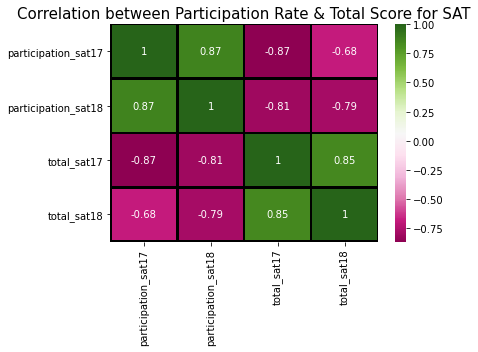

In [71]:
#showing this on a heatmap by taking participation & total scores for 2017 and 2018 SATs:
corr_sat = final[['participation_sat17','participation_sat18',
                          'total_sat17', 'total_sat18']]
sns.heatmap(corr_sat.corr(), annot = True, fmt='.2g', cmap = 'PiYG', linewidths=1.5,
           linecolor='black')

plt.title('Correlation between Participation Rate & Total Score for SAT', size=15);

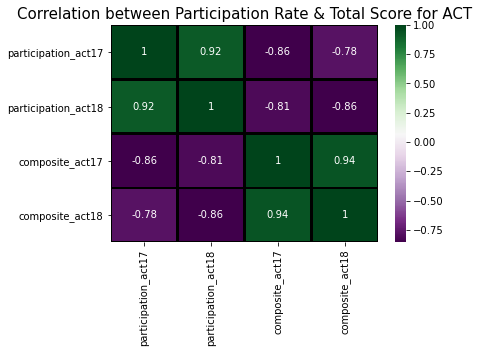

In [72]:
#showing this on a heatmap by taking participation & composite scores for 2017 and 2018 ACTs:
corr_sat = final[['participation_act17','participation_act18',
                          'composite_act17', 'composite_act18']]
sns.heatmap(corr_sat.corr(), annot = True, fmt='.2g', cmap = 'PRGn', linewidths=1.5,
           linecolor='black')

plt.title('Correlation between Participation Rate & Total Score for ACT', size=15);

#colours to focus on: deep purple

There is a strong negative correlation between the total SAT score and the SAT participation rates. In 2017, the correlation figure was -0.87 and in 2018, it was -0.79.

This is consistent with the year on year data for ACT composite as well. Participation and Composite score had a correlation factor of -0.86 in both 2017 and 2018.

This shows a strong inverse relationship between both factors - the higher the participation rate the lower the average total/composite score. This result might be indicative that where the SAT or ACT exams are mandated, students do not necessarily perform better - and if only the students who want to take these exams actually take them, a higher proportion of students would do better for these exams since they were not mandated to take these exams and rather only took them out of their own desired educational path.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20, 10))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column], label=column,  histtype='bar') 
        ax[i].legend(prop={'size': 10})
        ax[i].set_title(list_of_titles[i])        
        ax[i].set_xlabel(list_of_xlabels[i])
    
    fig.tight_layout(pad=3.0)    
    return fig,ax
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

Participation rates for SAT & ACT

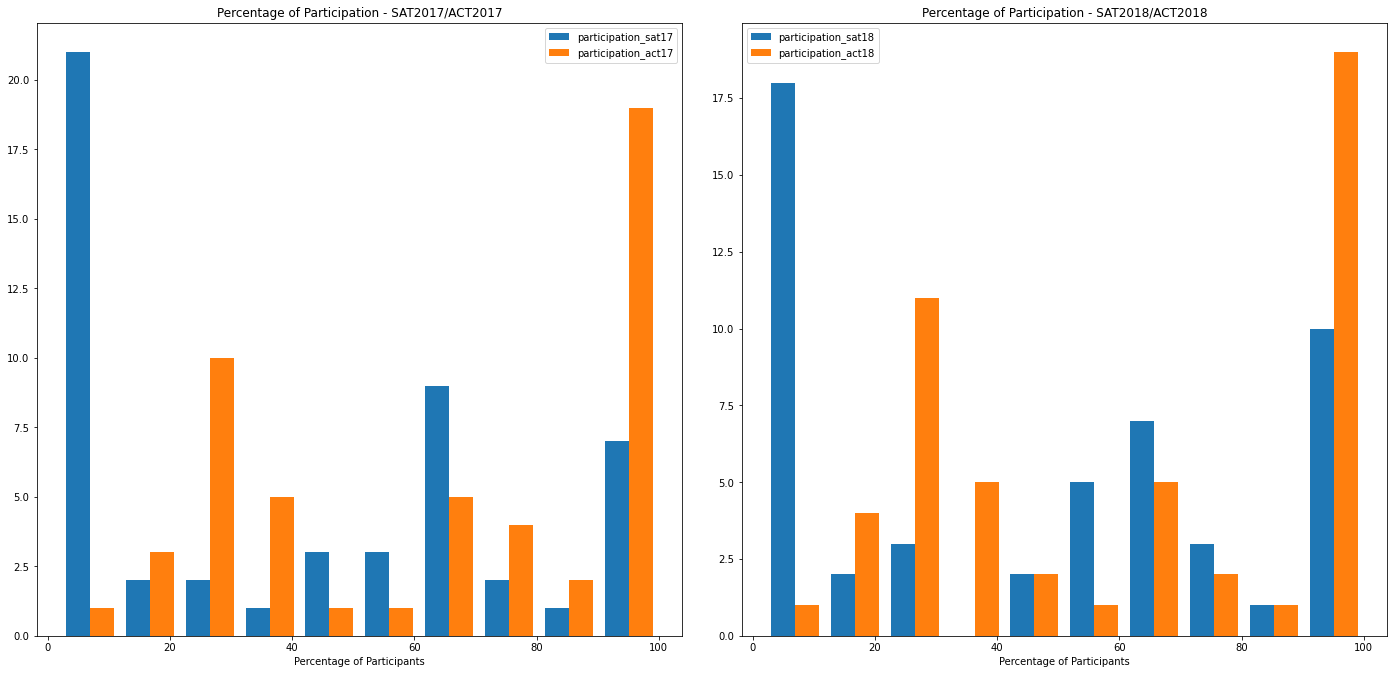

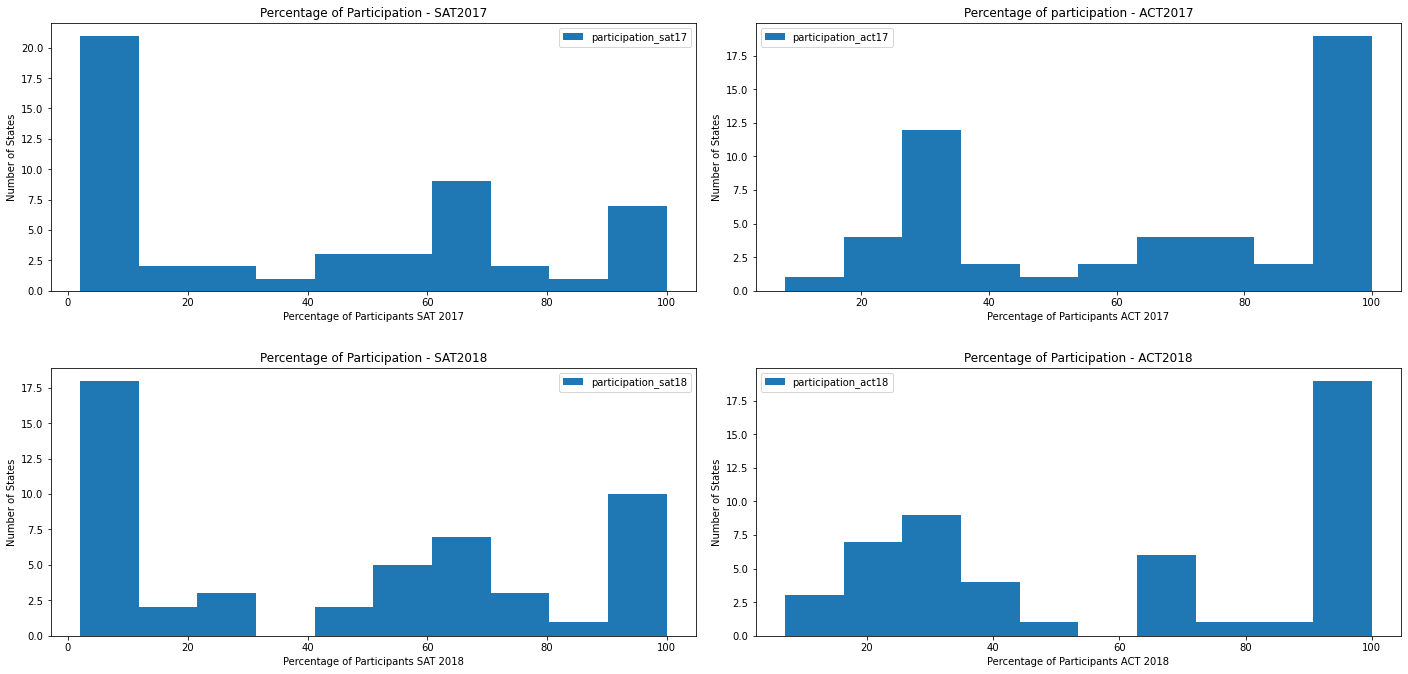

In [74]:
#PARTICIPATION RATES FOR SAT AND ACT

#Participation rates for SAT and ACT exams typically seem to be inversely related,
#especially at the boundaries. 
#at 0 to 10 percent participation, the number of states that observe this value is low
#for ACT but high for SAT.
#the higher the ACT exam participation rate, the lower the ACT exam rate.
#this observation also holds for year 2018.
#at the upper boundary, there is a large number of states with a high ACT participation 
#percentage, but less than half of the states have the same rate of SAT participation

subplot_histograms(final,
                   [["participation_sat17","participation_act17"],
                    ["participation_sat18","participation_act18"]],
                   ["Percentage of Participation - SAT2017/ACT2017",
                    "Percentage of Participation - SAT2018/ACT2018"],
                   ["Percentage of Participants",
                   "Percentage of Participants"]
)

fig,ax = subplot_histograms(final,
                   ["participation_sat17","participation_act17",
                    "participation_sat18","participation_act18"],
                   ["Percentage of Participation - SAT2017",
                    "Percentage of participation - ACT2017",
                    "Percentage of Participation - SAT2018",
                    "Percentage of Participation - ACT2018"],
                   ["Percentage of Participants SAT 2017",
                   "Percentage of Participants ACT 2017",
                   "Percentage of Participants SAT 2018",
                   "Percentage of Participants ACT 2018"])
for i in range(len(ax)):
    ax[i].set_ylabel("Number of States")


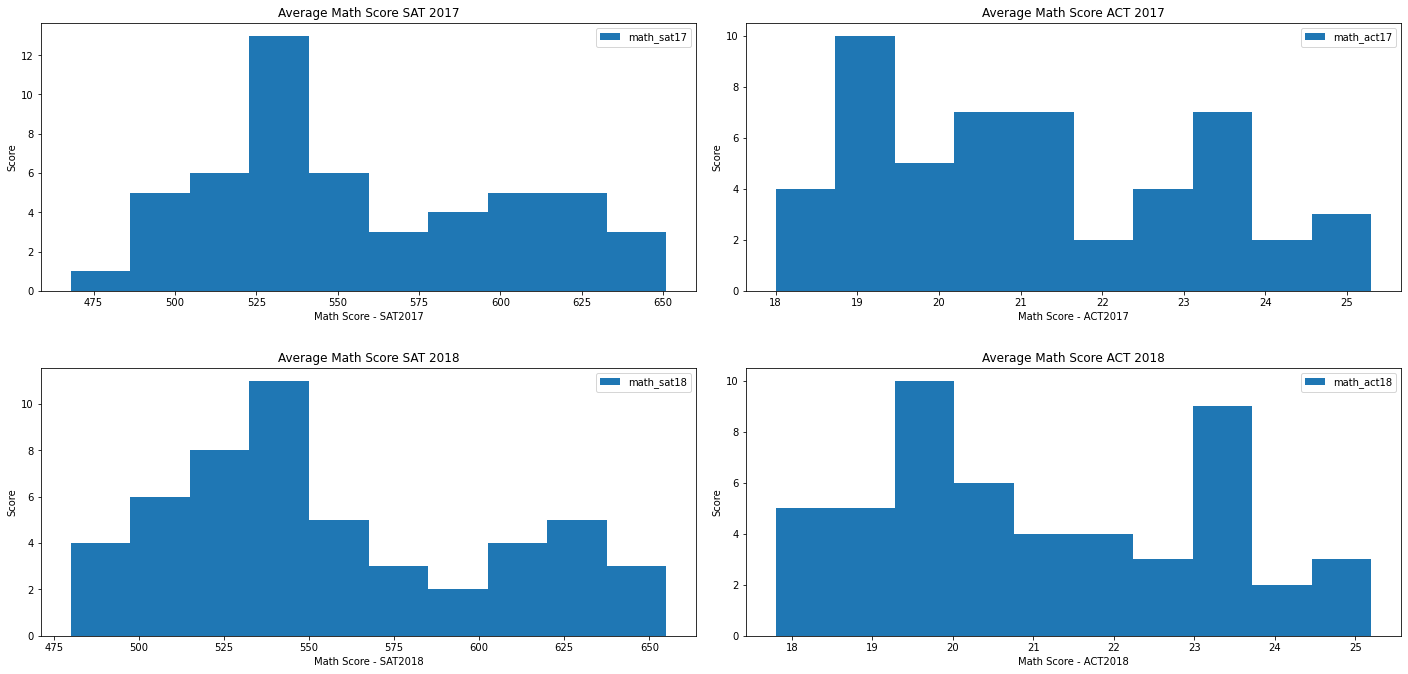

In [75]:
#Math scores for SAT & ACT
fig,ax = subplot_histograms(final,
                                 ["math_sat17","math_act17",
                                  "math_sat18","math_act18"],
                                 ["Average Math Score SAT 2017",
                                  "Average Math Score ACT 2017",
                                  "Average Math Score SAT 2018",
                                  "Average Math Score ACT 2018"],
                                 ["Math Score - SAT2017",
                                  "Math Score - ACT2017",
                                  "Math Score - SAT2018",
                                  "Math Score - ACT2018"])
for i in range(len(ax)):
    ax[i].set_ylabel("Score")


In [76]:
final.columns

Index(['state', 'participation_sat17',
       'evidence_based_reading_and_writing_sat17', 'math_sat17', 'total_sat17',
       'participation_act17', 'english_act17', 'math_act17', 'reading_act17',
       'science_act17', 'composite_act17', 'participation_sat18',
       'evidence_based_reading_and_writing_sat18', 'math_sat18', 'total_sat18',
       'participation_act18', 'english_act18', 'math_act18', 'reading_act18',
       'science_act18', 'composite_act18'],
      dtype='object')

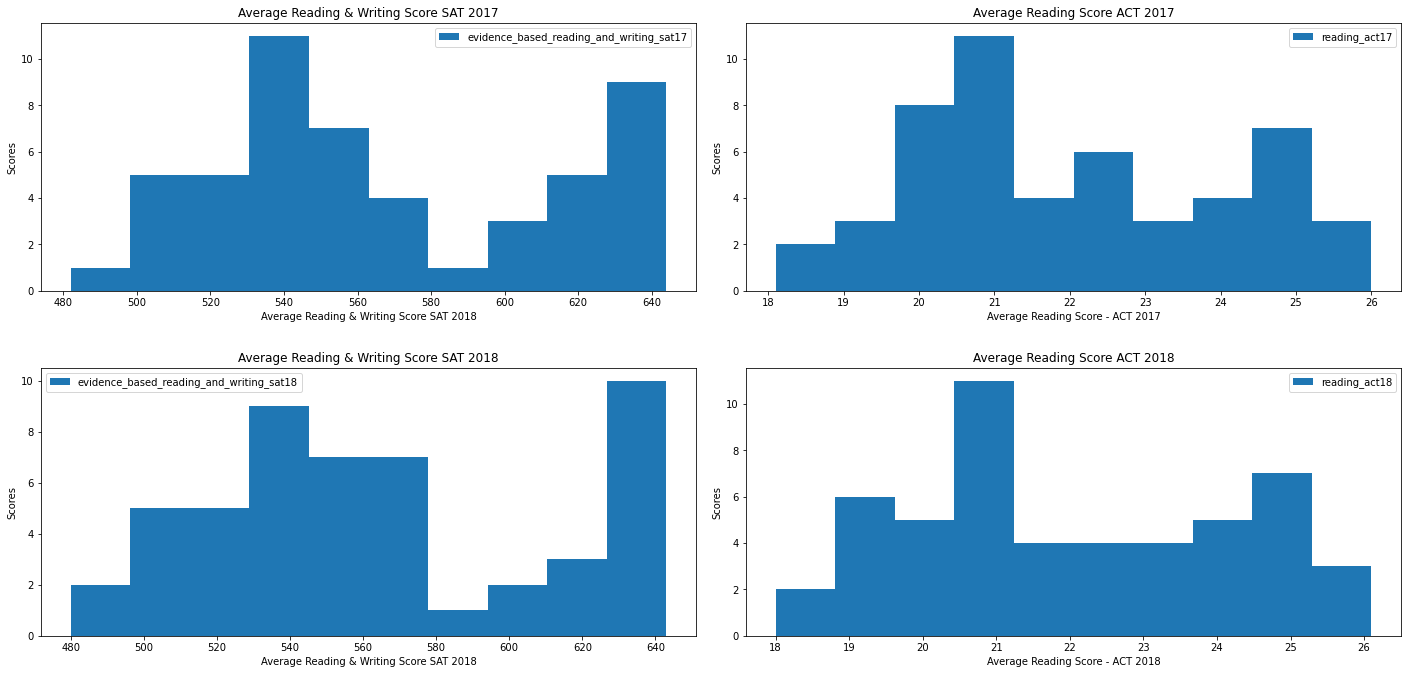

In [77]:
#Reading/verbal scores for SAT & ACT
fig,ax  = subplot_histograms(final,
                                           ["evidence_based_reading_and_writing_sat17",
                                            "reading_act17",
                                            "evidence_based_reading_and_writing_sat18",
                                            "reading_act18"],
                                           ["Average Reading & Writing Score SAT 2017",
                                            "Average Reading Score ACT 2017",
                                            "Average Reading & Writing Score SAT 2018",
                                            "Average Reading Score ACT 2018"],
                                           ["Average Reading & Writing Score SAT 2018",
                                            "Average Reading Score - ACT 2017",
                                            "Average Reading & Writing Score SAT 2018",
                                            "Average Reading Score - ACT 2018"])
for i in range(len(ax)):
    ax[i].set_ylabel("Scores")



#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


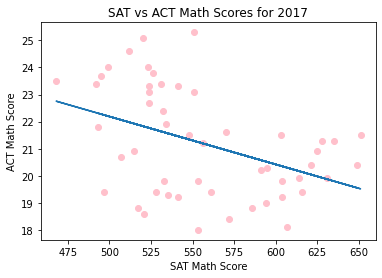

In [78]:
# Code

# manual plot of SAT vs. ACT math scores for 2017 using matplotlib

x1=final['math_sat17']
y1=final['math_act17']

plt.scatter(x1,y1,color='pink')
plt.title("SAT vs ACT Math Scores for 2017")
plt.xlabel("SAT Math Score")
plt.ylabel("ACT Math Score")

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b);

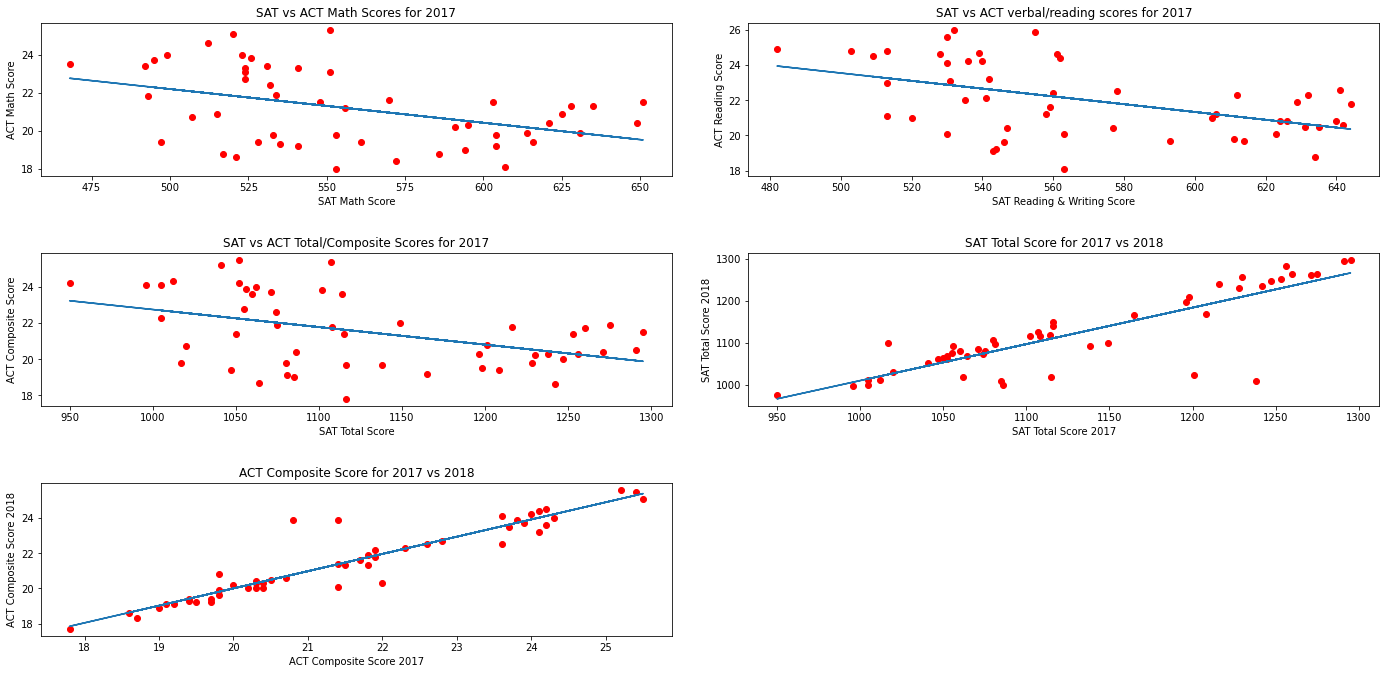

In [79]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles, list_of_labels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20, 10))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        x,y = column
        x,y = dataframe[x],dataframe[y]
        xLabel,yLabel = list_of_labels[i]
        ax[i].scatter(x,y, color='red')
        m, b = np.polyfit(x, y, 1)
        ax[i].plot(x, m*x + b);
        ax[i].set_xlabel(xLabel)
        ax[i].set_ylabel(yLabel)
        ax[i].set_title(list_of_titles[i])
    fig.tight_layout(pad=3.0)
    
    if len(list_of_columns) % 2 == 1:
            fig.delaxes(ax[-1])
            
subplot_scatter(final,
                   [["math_sat17","math_act17"],
                    ["evidence_based_reading_and_writing_sat17","reading_act17"],
                    ["total_sat17","composite_act17"],
                    ["total_sat17","total_sat18"],
                    ["composite_act17","composite_act18"]],
                   
                   ["SAT vs ACT Math Scores for 2017",
                    "SAT vs ACT verbal/reading scores for 2017",
                    "SAT vs ACT Total/Composite Scores for 2017",
                    "SAT Total Score for 2017 vs 2018",
                    "ACT Composite Score for 2017 vs 2018"],
                   
                   [["SAT Math Score","ACT Math Score"],
                    ["SAT Reading & Writing Score","ACT Reading Score"],
                    ["SAT Total Score","ACT Composite Score"],
                    ["SAT Total Score 2017","SAT Total Score 2018"],
                    ["ACT Composite Score 2017","ACT Composite Score 2018"]]
)



In [80]:
# #manual plot
# #SAT vs. ACT verbal/reading scores for 2017 

# x2=final['evidence_based_reading_and_writing_sat17']
# y2=final['reading_act17']

# plt.scatter(x2,y2,color='pink')
# plt.title("SAT vs. ACT verbal/reading scores for 2017")
# plt.xlabel("SAT Reading & Writing Score")
# plt.ylabel("ACT Reading Score")

# m, b = np.polyfit(x2, y2, 1)
# plt.plot(x2, m*x2 + b);

In [81]:
##manual plot
#SAT vs. ACT total/composite scores for 2017
# x3=final['total_sat17']
# y3=final['composite_act17']

# plt.scatter(x3,y3,color='pink')
# plt.title("SAT vs ACT Total/Composite Scores for 2017")
# plt.xlabel("SAT Total Score")
# plt.ylabel("ACT Composite Score")

# m, b = np.polyfit(x3, y3, 1)
# plt.plot(x3, m*x3 + b);


In [82]:
final.columns

Index(['state', 'participation_sat17',
       'evidence_based_reading_and_writing_sat17', 'math_sat17', 'total_sat17',
       'participation_act17', 'english_act17', 'math_act17', 'reading_act17',
       'science_act17', 'composite_act17', 'participation_sat18',
       'evidence_based_reading_and_writing_sat18', 'math_sat18', 'total_sat18',
       'participation_act18', 'english_act18', 'math_act18', 'reading_act18',
       'science_act18', 'composite_act18'],
      dtype='object')

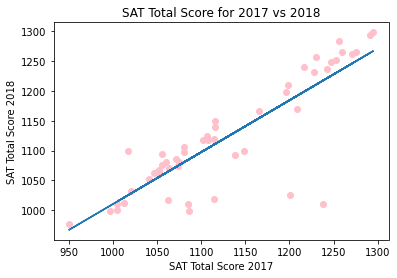

In [83]:
#Total scores for SAT 2017 vs. 2018 -- Manual plot
#SAT vs. ACT total/composite scores for 2017
a1 = final['total_sat17']
b1 = final['total_sat18']

plt.scatter(a1,b1,color='pink')
plt.title("SAT Total Score for 2017 vs 2018")
plt.xlabel("SAT Total Score 2017")
plt.ylabel("SAT Total Score 2018")

m, b = np.polyfit(a1, b1, 1)
plt.plot(a1, m*a1 + b);

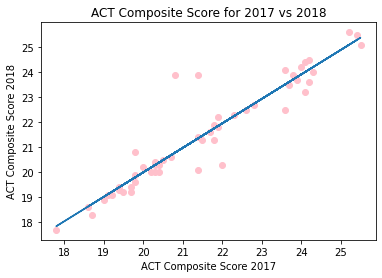

In [84]:
#Composite scores for ACT 2017 vs. 2018 -- Manual plot
a2 = final['composite_act17']
b2 = final['composite_act18']

plt.scatter(a2,b2, color='pink')
plt.title("ACT Composite Score for 2017 vs 2018")
plt.xlabel("ACT Composite Score 2017")
plt.ylabel("ACT Composite Score 2018")

m, b = np.polyfit(a2, b2, 1)
plt.plot(a2, m*a2 + b);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='math_act18'>

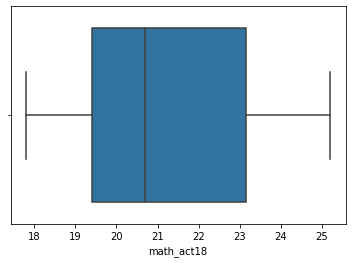

In [85]:
#manually plotting boxplots:
sns.boxplot(final['math_act18'], orient='v')

/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nglynette/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/seaborn/_core.py:1

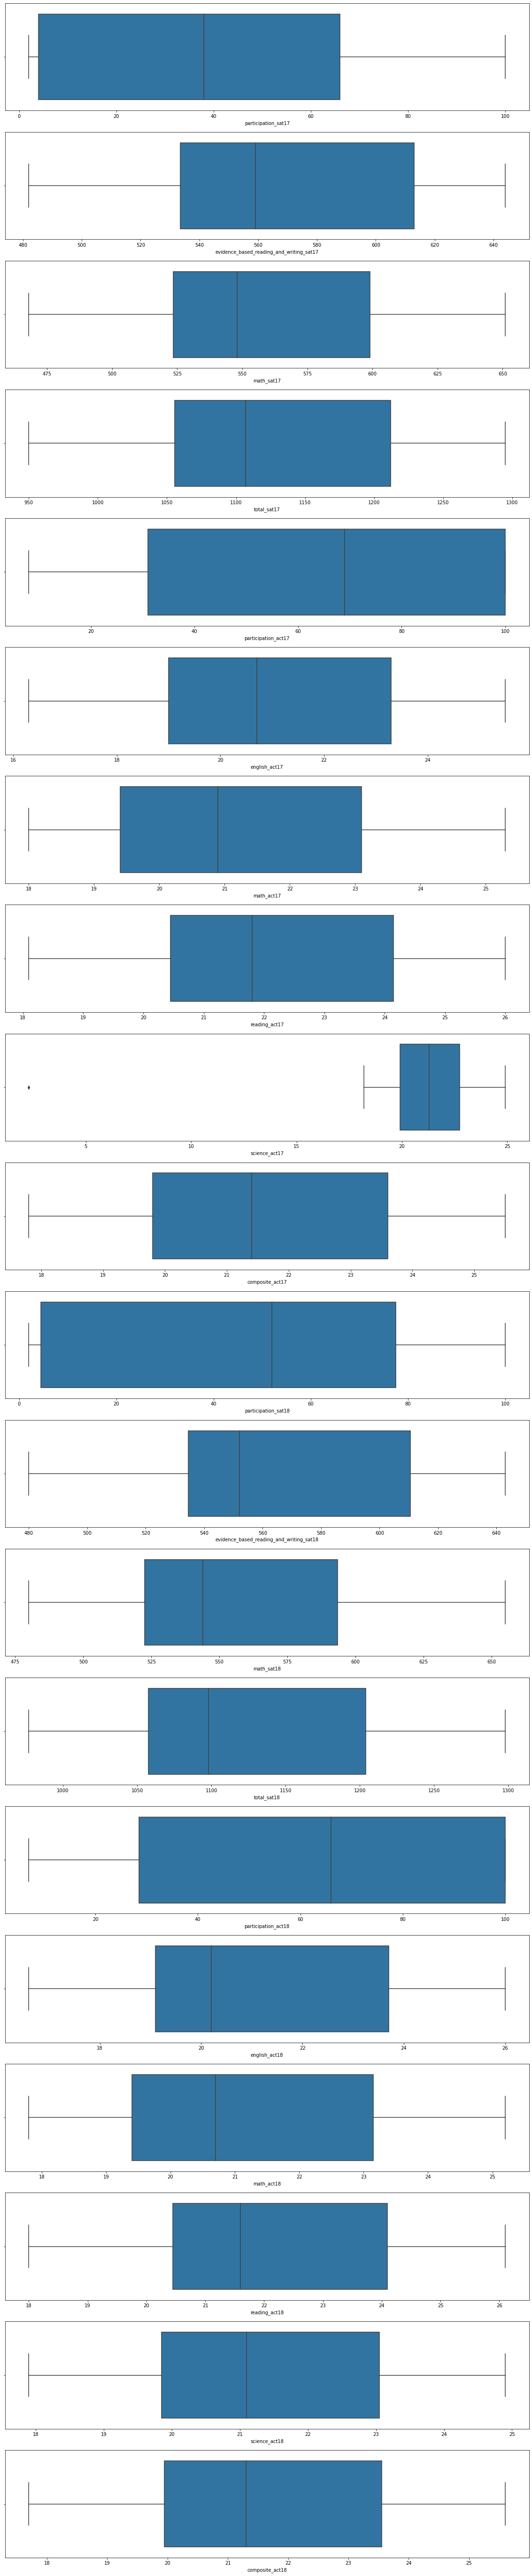

In [86]:
#using a for loop:
final_numeric = final.select_dtypes(include=np.number)
fig, ax = plt.subplots(nrows=len(final_numeric.columns),figsize=(20, 100))
for i,col in enumerate(final_numeric.columns):
    sns.boxplot(final_numeric[col], orient='v', ax=ax[i])

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [87]:
#the boxplot for Science ACT 17 has an extremely low in value outlier
#printing to check:
print("SCIENCE ACT 17")
print(final['science_act17'].describe(),"\n\n")
print("SCIENCE ACT 18")
print(final['science_act18'].describe())

SCIENCE ACT 17
count    51.000000
mean     21.041176
std       3.182463
min       2.300000
25%      19.900000
50%      21.300000
75%      22.750000
max      24.900000
Name: science_act17, dtype: float64 


SCIENCE ACT 18
count    51.000000
mean     21.345098
std       1.870114
min      17.900000
25%      19.850000
50%      21.100000
75%      23.050000
max      24.900000
Name: science_act18, dtype: float64


(15.0, 36.0)

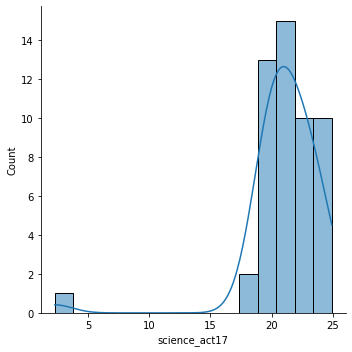

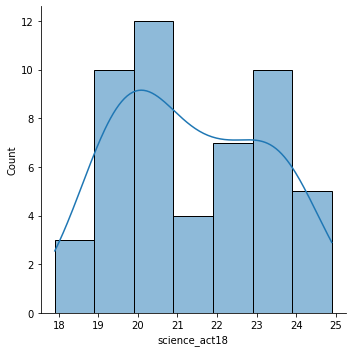

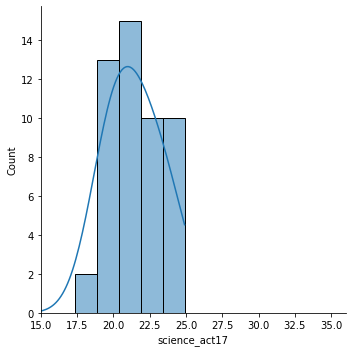

In [88]:
#plotting distribution plots to see skewedness
#for ACT 2017 - SCIENCE
sns.displot(final['science_act17'], kde=True);

#for ACT 2018 - SCIENCE
sns.displot(final['science_act18'], kde=True);

#for ACT 2017 - SCIENCE - but with lower bound set at x=15 to exclude outlier.
sns.displot(final['science_act17'], kde=True);
plt.xlim(15,36)

With the first plot for Science ACT 2017 - we see that the distribution is 
skewed on the far right


The shape of this distribution plot in the second figure is very different from that of Science ACT 2018.


In the third plot, we see that however if we set boundaries to remove the extreme outlier values, the Science ACT 2017 distribution plot starts to follow a normal distribution.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
Participation rates (SAT&ACT17, SAT&ACT18): SAT participation rates are left skewed, while ACT participation rates tend to be right skewed.

Reading & Writing (SAT17&18): Yes - mostly centrally distributed
Reading (ACT17&18): Yes - mostly centrally distributed
Math (SAT&ACT17, SAT&ACT18): Yes - mostly centrally distributed
English (ACT17&18): Yes - mostly centrally distributed
Science (ACT17&18): Yes - centrally distributed but only if we leave the outliers out.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Math has data that are distributed normally around the mean with a slight left skew.
The assumption also holds for reading.

Participation rates already include most of the data and since many states either make the SAT or ACT exam mandatory, it is unlikely that the distribution of the sample means will approximate towards a normal distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Yes - for example, hypothesis testing could be set up as such:
Given that a state's participation in both exams is >50%, what would be the probability that the total or composite score is less than a certain amount? However, our sample size may be too small to perform this test.

If participation rate in both exams is >50%, it could indicate that students who have an end target in mind would want to take both exams to qualify them for as many colleges as possible - thus the total & composite scores would correspond to a high participation rate. On the other hand, if it's a result of state-mandated exams, the proportion of students who actually wanted to take these exams vs the students who actually took these exams may be low, since students who do not want to attend post-secondary institutions that look at SAT/ACT scores may have also been made to take the exams anyway.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Yes - but only if it's scaled (for example, as a percentage of the maximum possible score). SAT & ACT tests should both be standardized and should therefore present a true representation of a student's math skills. However since the grading system is different and are both numeric values, if not scaled or normalized then our information would be presented incorrectly.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [89]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

1) Colorado - Colorado has a sharp increase in participation rates for SAT & a sharp decrease in participation rates for ACT over the years 2017 to 2018.

SAT partipation rate increased from 11% in 2017 to 100% in 2018.
ACT participation rate decreased from 100% in 2017 to 30% in 2018.

Reason - Colorado switched from ACT tests to SAT tests - hence explaining the sharp decline in ACT participation rates along with the sharp increase in SAT participatioon rates.

Source: https://www.coloradokids.org/colorado-switches-from-act-to-sat-for-high-school-college-entrance-assessments/

2) South Carolina - ACT participation rates increased to 100% - likely due to the SC Legislature mandating ACT Exams.
Source:
https://www.postandcourier.com/news/act-scores-rise-slightly-for-south-carolinas-class-of-2017/article_4846e3fe-9349-11e7-b655-8777e2ba289c.html

3) North Carolina - One of the 17 states that made it mandatory for students to take the SAT.
Source:
https://www.newsobserver.com/news/local/article220102340.html#:~:text=One%20reason%20for%20North%20Carolina's,intend%20to%20go%20to%20college.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

We can see that not mandating the exams does not necessarily mean higher test scores, since students who do not want to take these exams may be made to take them. Iowa is an example of very low SAT participation rates, but yet has high average SAT total scores.

Increasing participation rate may not necessarily be beneficial unless emphasis is placed on the importance of these exams.

# Annex

In [90]:
final.columns

Index(['state', 'participation_sat17',
       'evidence_based_reading_and_writing_sat17', 'math_sat17', 'total_sat17',
       'participation_act17', 'english_act17', 'math_act17', 'reading_act17',
       'science_act17', 'composite_act17', 'participation_sat18',
       'evidence_based_reading_and_writing_sat18', 'math_sat18', 'total_sat18',
       'participation_act18', 'english_act18', 'math_act18', 'reading_act18',
       'science_act18', 'composite_act18'],
      dtype='object')

In [91]:
# sns.displot(final['math_sat17'], kde=True)
# sns.displot(final['math_sat18'], kde=True)
# sns.displot(final['math_act17'], kde=True)
# sns.displot(final['math_act18'], kde=True)

# sns.displot(final['evidence_based_reading_and_writing_sat17'], kde=True)
# sns.displot(final['evidence_based_reading_and_writing_sat18'], kde=True)
# sns.displot(final['reading_act17'], kde=True)
# sns.displot(final['reading_act18'], kde=True)

# sns.displot(final['science_act17'], kde=True)
# sns.displot(final['science_act18'], kde=True)

# sns.displot(final['english_act17'], kde=True)
# sns.displot(final['english_act18'], kde=True)